<a href="https://colab.research.google.com/github/SJhawar1010/Computer-Vision/blob/main/2348554_CV_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
img = cv2.imread('/content/drive/MyDrive/CV_images/avg21.jpg',0)

array([[12, 12, 11, ..., 38, 34, 31],
       [12, 12, 11, ..., 36, 32, 28],
       [12, 12, 11, ..., 32, 28, 25],
       ...,
       [33, 33, 33, ..., 38, 38, 38],
       [33, 33, 33, ..., 34, 34, 34],
       [33, 33, 33, ..., 32, 32, 32]], dtype=uint8)
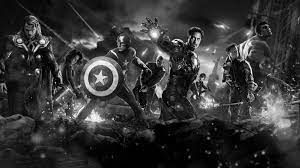

In [4]:
img

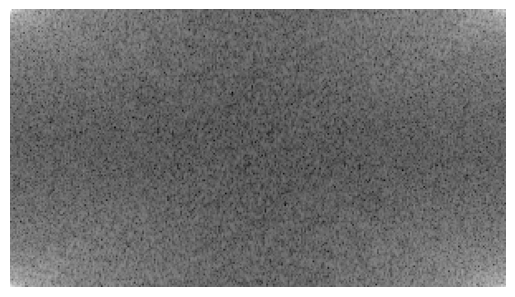

In [12]:
#Image in frequency domain
F = np.fft.fft2(img)
plt.imshow(np.log1p(np.abs(F)),cmap='gray')
plt.axis('off')
plt.show()

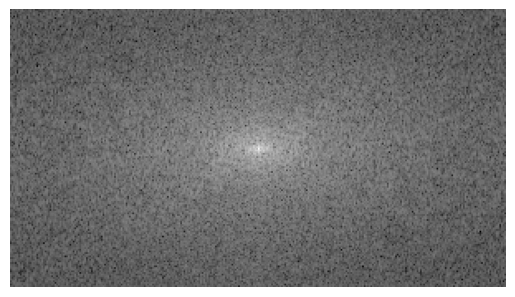

In [13]:
#Shifiting low frequency component to centere of the image
Fshift = np.fft.fftshift(F)
plt.imshow(np.log1p(np.abs(Fshift)),'gray')
plt.axis('off')
plt.show()

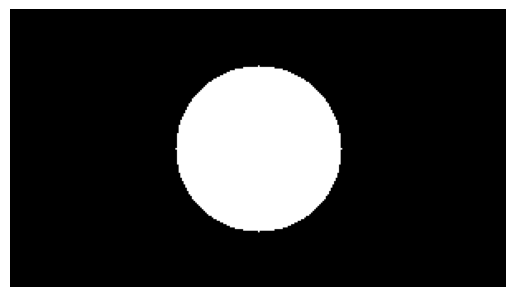

In [17]:
#Low pass filter
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50

for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
plt.imshow(H,'gray')
plt.axis('off')
plt.show()

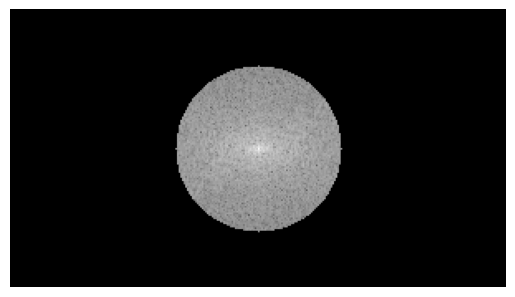

In [18]:
#Ideal Low pass filter
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),'gray')
plt.axis('off')
plt.show()

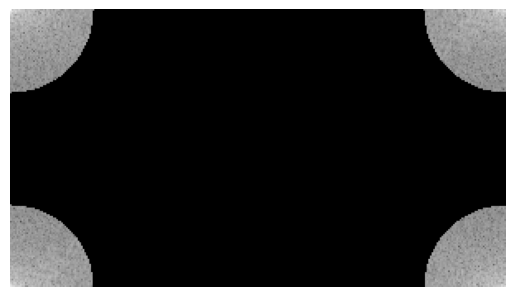

In [19]:
#Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),'gray')
plt.axis('off')
plt.show()

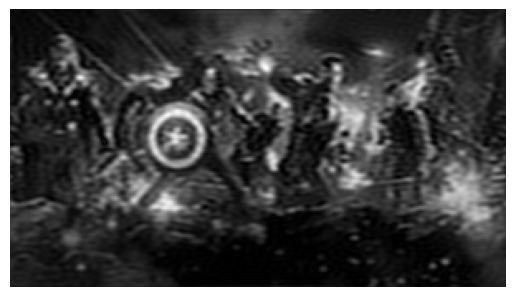

In [21]:
#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g,'gray')
plt.axis('off')
plt.show()

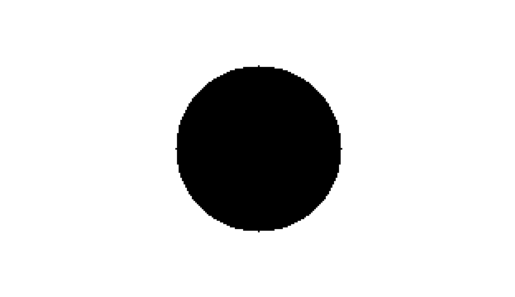

In [22]:
#High Pass Filter

H = 1 - H
plt.imshow(H,'gray')
plt.axis('off')
plt.show()

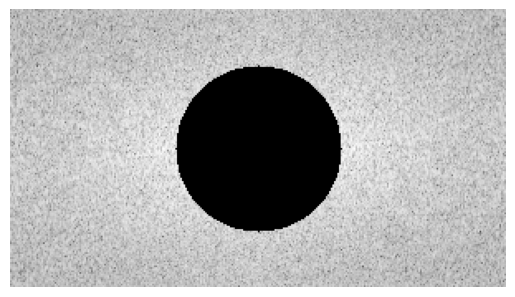

In [23]:
#Ideal High Pass Filtering

Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),'gray')
plt.axis('off')
plt.show()

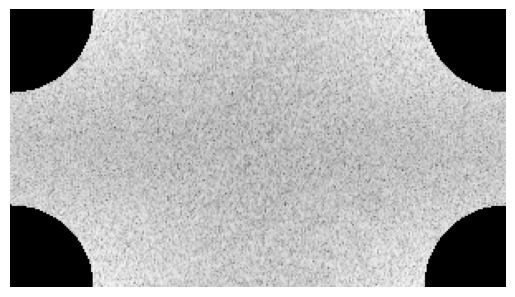

In [24]:
#Inverse the shifted Fourier Transform

G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)),'gray')
plt.axis('off')
plt.show()

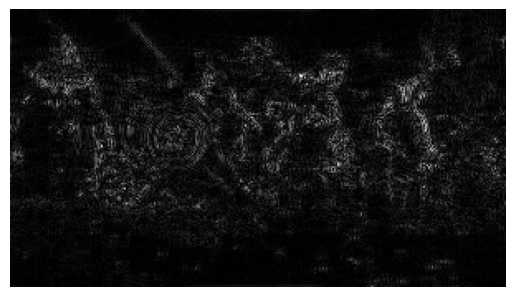

In [25]:
#Inverse Fourier Transform

g = np.abs(np.fft.ifft2(G))
plt.imshow(g,'gray')
plt.axis('off')
plt.show()